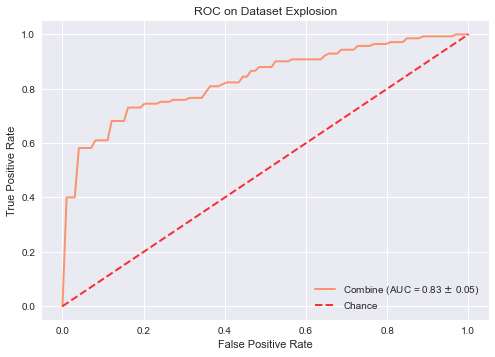

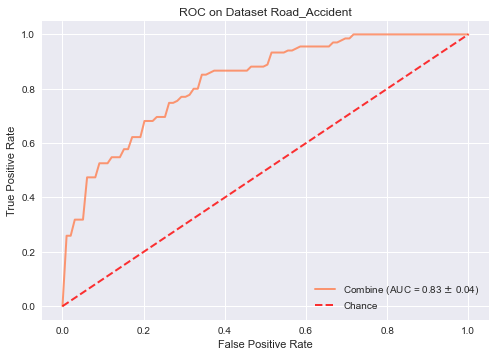

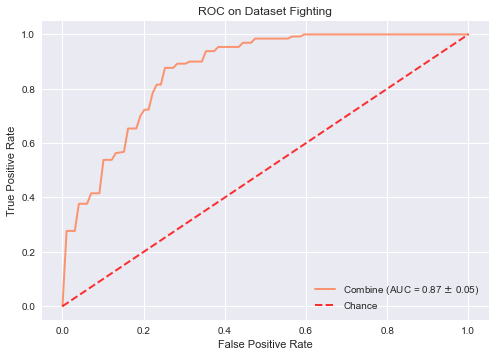

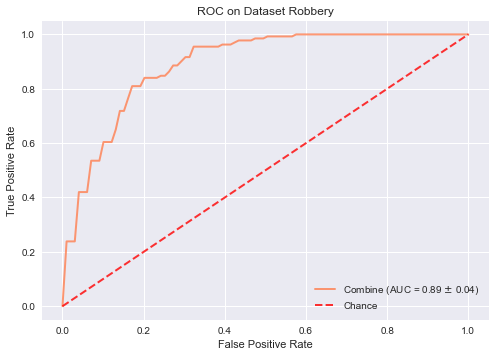

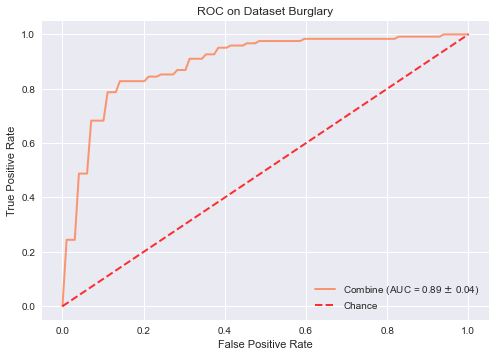

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.metrics import auc,roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler,normalize
plt.style.use('seaborn')
import seaborn as sns
datasets=['Explosion','Road_Accident','Fighting','Robbery','Burglary']

parameters = {'C':list(np.arange(0,5,0.05)),'kernel':['rbf'],'probability': [True]}
for dataset_name in datasets:
    Gray_data = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Combine/CDI/Intensity/CSV/'+dataset_name+'/Gray.csv',index_col=0)
    Canny_data = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Combine/CDI/Intensity/CSV/'+dataset_name+'/Canny.csv',index_col=0)
    Laplacian_data = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Combine/CDI/Intensity/CSV/'+dataset_name+'/Laplacian.csv',index_col=0)
    Harris_data = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Combine/CDI/Intensity/CSV/'+dataset_name+'/Harris.csv',index_col=0)
    Optical_Ang_data = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Combine/CDI/Intensity/CSV/'+dataset_name+'/Optical_Ang.csv',index_col=0)
    Optical_Mag_data = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Combine/CDI/Intensity/CSV/'+dataset_name+'/Optical_Mag.csv',index_col=0)
    Euler_data = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Combine/CDI/Intensity/CSV/'+dataset_name+'/Euler.csv',index_col=0)

    y=Gray_data['Class'].values
    Gray_X=Gray_data.drop(['Class'], axis=1).values
    Gray_X=normalize(Gray_X, norm='l2')

    
    Canny_X=Canny_data.drop(['Class'], axis=1).values
    Canny_X=normalize(Canny_X, norm='l2')

    
    Laplacian_X=Laplacian_data.drop(['Class'], axis=1).values
    Laplacian_X=normalize(Laplacian_X, norm='l2')

    
    Harris_X=Harris_data.drop(['Class'], axis=1).values
    Harris_X=normalize(Harris_X, norm='l2')

    
    Optical_Ang_X=Optical_Ang_data.drop(['Class'], axis=1).values
    Optical_Ang_X=normalize(Optical_Ang_X, norm='l2')

    
    Optical_Mag_X=Optical_Mag_data.drop(['Class'], axis=1).values
    Optical_Mag_X=normalize(Optical_Mag_X, norm='l2')

    
    Euler_X=Euler_data.drop(['Class'], axis=1).values
    Euler_X=normalize(Euler_X, norm='l2')
    X=np.hstack((Gray_X,Canny_X,Laplacian_X,Harris_X,Optical_Mag_X,Euler_X,Optical_Ang_X))
#     X=np.hstack(Gray_X,Canny_X)
#     X=np.hstack(X,Laplacian_X)
#     X=np.hstack(X,Harris_X)
#     X=np.hstack(X,Optical_Ang_X)
#     X=np.hstack(X,Optical_Mag_X)
#     X=np.hstack(X,Euler_X)
    gs=GridSearchCV(SVC(), parameters, refit = True, cv = 5, verbose = 0, n_jobs = -1,scoring='roc_auc').fit(X,y)
    classifier=gs.best_estimator_

    cv = StratifiedKFold(n_splits=5)
    fig, ax = plt.subplots()
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    for i, (train, test) in enumerate(cv.split(X, y)):
#         std =StandardScaler()
#         X_train=std.fit_transform(X[train])
#         X_test=std.transform(X[test])
        X_train,X_test=X[train],X[test]
        classifier.fit(X_train, y[train])
        test_prob = classifier.decision_function(X_test)
        Pred_prob=classifier.predict_proba(X_test)
        fpr_test,tpr_test,_ = roc_curve(y[test],Pred_prob[:,1])     
        auc_test = auc(fpr_test,tpr_test)
        interp_tpr = np.interp(mean_fpr,fpr_test, tpr_test)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(auc_test)
        
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='coral',label='Combine'+' (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2, alpha=.8)
        
        
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],title='ROC on Dataset '+dataset_name,xlabel='False Positive Rate',
           ylabel='True Positive Rate')
    ax.legend(loc="lower right")
    plt.show()

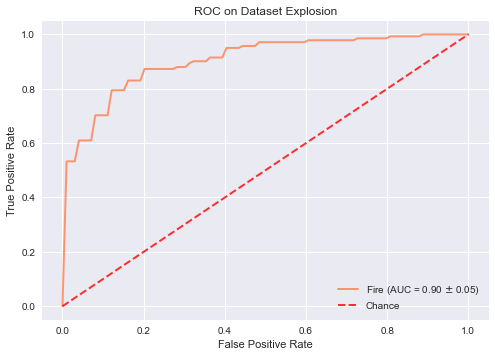

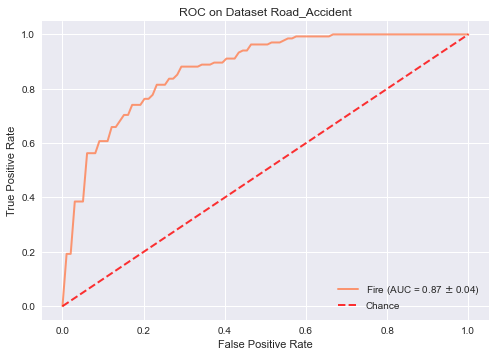

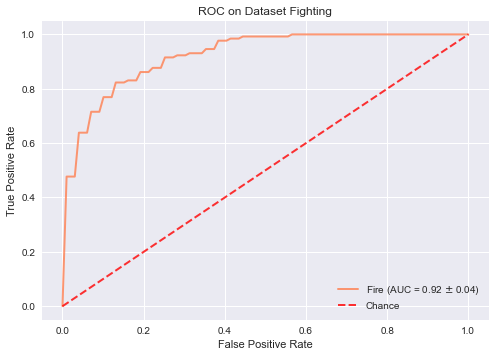

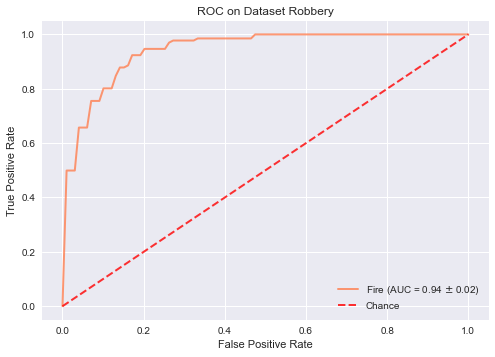

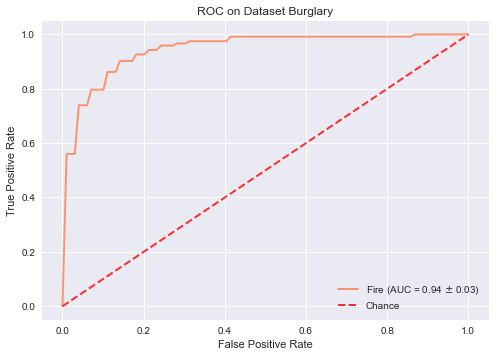

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.metrics import auc,roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
plt.style.use('seaborn')
import seaborn as sns
datasets=['Explosion','Road_Accident','Fighting','Robbery','Burglary']

parameters = {'C':list(np.arange(0,5,0.05)),'kernel':['rbf'],'probability': [True]}
for dataset_name in datasets:
    Gray_data = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Combine/CDI/Intensity/CSV/'+dataset_name+'/Gray.csv',index_col=0)
    Canny_data = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Combine/CDI/Intensity/CSV/'+dataset_name+'/Canny.csv',index_col=0)
    Laplacian_data = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Combine/CDI/Intensity/CSV/'+dataset_name+'/Laplacian.csv',index_col=0)
    Harris_data = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Combine/CDI/Intensity/CSV/'+dataset_name+'/Harris.csv',index_col=0)
    Optical_Ang_data = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Combine/CDI/Intensity/CSV/'+dataset_name+'/Optical_Ang.csv',index_col=0)
    Optical_Mag_data = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Combine/CDI/Intensity/CSV/'+dataset_name+'/Optical_Mag.csv',index_col=0)
    Euler_data = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Combine/CDI/Intensity/CSV/'+dataset_name+'/Euler.csv',index_col=0)

    Gray_y=Gray_data['Class'].values
    Gray_X=Gray_data.drop(['Class'], axis=1).values
    gs=GridSearchCV(SVC(), parameters, refit = True, cv = 5, verbose = 0, n_jobs = -1,scoring='roc_auc').fit(Gray_X,Gray_y)
    Gray_classifier=gs.best_estimator_


    Canny_y=Canny_data['Class'].values
    Canny_X=Canny_data.drop(['Class'], axis=1).values
    gs=GridSearchCV(SVC(), parameters, refit = True, cv = 5, verbose = 0, n_jobs = -1,scoring='roc_auc').fit(Canny_X,Canny_y)
    Canny_classifier=gs.best_estimator_

    Laplacain_y=Laplacian_data['Class'].values
    Laplacian_X=Laplacian_data.drop(['Class'], axis=1).values
    gs=GridSearchCV(SVC(), parameters, refit = True, cv = 5, verbose = 0, n_jobs = -1,scoring='roc_auc').fit(Laplacian_X,Laplacain_y)
    Laplacian_classifier=gs.best_estimator_

    Harris_y=Harris_data['Class'].values
    Harris_X=Harris_data.drop(['Class'], axis=1).values
    gs=GridSearchCV(SVC(), parameters, refit = True, cv = 5, verbose = 0, n_jobs = -1,scoring='roc_auc').fit(Harris_X,Harris_y)
    Harris_classifier=gs.best_estimator_

    Optical_Ang_y=Optical_Ang_data['Class'].values
    Optical_Ang_X=Optical_Ang_data.drop(['Class'], axis=1).values
    gs=GridSearchCV(SVC(), parameters, refit = True, cv = 5, verbose = 0, n_jobs = -1,scoring='roc_auc').fit(Optical_Ang_X,Optical_Ang_y)
    Ang_classifier=gs.best_estimator_

    Optical_Mag_y=Optical_Mag_data['Class'].values
    Optical_Mag_X=Optical_Mag_data.drop(['Class'], axis=1).values
    gs=GridSearchCV(SVC(), parameters, refit = True, cv = 5, verbose = 0, n_jobs = -1,scoring='roc_auc').fit(Optical_Mag_X,Optical_Mag_y)
    Mag_classifier=gs.best_estimator_

    Euler_y=Euler_data['Class'].values
    Euler_X=Euler_data.drop(['Class'], axis=1).values
    gs=GridSearchCV(SVC(), parameters, refit = True, cv = 5, verbose = 0, n_jobs = -1,scoring='roc_auc').fit(Euler_X,Euler_y)
    Euler_classifier=gs.best_estimator_

    cv = StratifiedKFold(n_splits=5)
    fig, ax = plt.subplots()
    tprs=[]
    aucs=[]
    mean_fpr = np.linspace(0, 1, 100)
    for i, (train, test) in enumerate(cv.split(Gray_X, Gray_y)):
        std =StandardScaler()
        X_Gray_train=std.fit_transform(Gray_X[train])
        X_Gray_test=std.transform(Gray_X[test])

        X_Canny_train=std.fit_transform(Canny_X[train])
        X_Canny_test=std.transform(Canny_X[test])

        X_Laplacian_train=std.fit_transform(Laplacian_X[train])
        X_Laplacian_test=std.transform(Laplacian_X[test])

        X_Harris_train=std.fit_transform(Harris_X[train])
        X_Harris_test=std.transform(Harris_X[test])

        X_Mag_train=std.fit_transform(Optical_Mag_X[train])
        X_Mag_test=std.transform(Optical_Mag_X[test]) 

        X_Ang_train=std.fit_transform(Optical_Ang_X[train])
        X_Ang_test=std.transform(Optical_Ang_X[test]) 

        X_Euler_train=std.fit_transform(Euler_X[train])
        X_Euler_test=std.transform(Euler_X[test])         


        Gray_classifier.fit(X_Gray_train, Gray_y[train])
        Gray_prob=Gray_classifier.predict_proba(X_Gray_test)

        Canny_classifier.fit(X_Canny_train, Gray_y[train])
        Canny_prob=Canny_classifier.predict_proba(X_Canny_test)    

        Laplacian_classifier.fit(X_Laplacian_train, Gray_y[train])
        Laplacian_prob=Laplacian_classifier.predict_proba(X_Laplacian_test)     

        Harris_classifier.fit(X_Harris_train, Gray_y[train])
        Harris_prob=Harris_classifier.predict_proba(X_Harris_test)

        Mag_classifier.fit(X_Mag_train, Gray_y[train])
        Mag_prob=Mag_classifier.predict_proba(X_Mag_test)

        Ang_classifier.fit(X_Ang_train, Gray_y[train])
        Ang_prob=Ang_classifier.predict_proba(X_Ang_test)

        Euler_classifier.fit(X_Euler_train, Gray_y[train])
        Euler_prob=Euler_classifier.predict_proba(X_Euler_test)


        probs=[Gray_prob[:,1],Laplacian_prob[:,1],Euler_prob[:,1],Mag_prob[:,1],Ang_prob[:,1],Harris_prob[:,1],Canny_prob[:,1]]

        w1=np.arange(0,1+0.01,0.01)    
        max_auc=0

        for i in w1:
            w2=np.arange(0,1-i+0.1,0.1)
            for r in w2:
                w3=np.arange(0,1-i-r+0.1,0.1)
                for j in w3:
                    w4=np.arange(0,1-i-r-j+0.1,0.1)
                    for k in w4:
                        w5=np.arange(0,1-i-r-j-k+0.1,0.1)
                        for n in w5:
                            w6=np.arange(0,1-i-r-j-k-n+0.1,0.1)
                            for m in w6:
                                pw1,pw2,pw3,pw4,pw5,pw6,=i,r,j,k,n,m
                                pw7=1-i-r-j-k-n-m
                                combine_prob=probs[0]*pw1+probs[1]*pw2+probs[2]*pw3+probs[3]*pw4+probs[4]*pw5+probs[5]*pw6+probs[6]*pw7
                                fpr_test,tpr_test,_ = roc_curve(Gray_y[test],combine_prob)     
                                auc_test = auc(fpr_test,tpr_test)
                                if auc_test>max_auc:
                                    max_auc=auc_test
                                    max_para=[pw1,pw2,pw3,pw4,pw5,pw6,pw7]
                                    max_combine_prob=combine_prob      
    #     mean_prob=np.mean(probs,axis=0)
        fpr_test,tpr_test,_ = roc_curve(Gray_y[test],max_combine_prob)     
        auc_test = auc(fpr_test,tpr_test)  
        interp_tpr = np.interp(mean_fpr,fpr_test, tpr_test)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(auc_test)
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='coral',label='Fire'+' (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2, alpha=.8)
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],title='ROC on Dataset '+dataset_name,xlabel='False Positive Rate',
               ylabel='True Positive Rate')
    ax.legend(loc="lower right")
    plt.show()